**Borrelia 2019_all Clinical**

2019_all.csv :  2019 only, all febrile patients including the malaria positive patients. Lab data is removed. 

**1. Importing and Reading Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

2019Final&Lab_data.ipynb       2019_all.csv
2019Final_clinical_data.ipynb


In [3]:
df = pd.read_csv("2019_all.csv")

In [4]:
df

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,SHC0701,54.0,F,Thies,36.2,no_fever,2.0,78.0,normal,2.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,SHC0702,12.0,F,Thies,39.3,fever,1.0,99.0,normal,2.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,SHC0703,54.0,F,Thies,37.7,no_fever,2.0,119.0,high,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,SHC0704,30.0,M,Thies,36.8,no_fever,2.0,92.0,normal,2.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,SHC0705,17.0,F,Thies,37.0,no_fever,2.0,88.0,normal,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        201 non-null    object 
 1   Age                               201 non-null    float64
 2   Sexe                              201 non-null    object 
 3   Lieu actuel de ésidence_category  196 non-null    object 
 4   Temperature                       201 non-null    float64
 5   Temperature_category              201 non-null    object 
 6   NbreJrsFievre                     184 non-null    float64
 7   Rythme cardiaque                  190 non-null    float64
 8   Rythme cardiaque_category         190 non-null    object 
 9   Antibiotiques pris                200 non-null    float64
 10  Antipaludiques pris               188 non-null    float64
 11  Diagnostic paludisme recu         200 non-null    float64
 12  enceinte

In [6]:
#calling out continuous variables from data
def get_continuous_variables(df):
    continuous_vars = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continuous_vars.append(col)
    return continuous_vars

In [7]:
continuous_variables = get_continuous_variables(df)
print("Continuous variables:", continuous_variables)

Continuous variables: ['Age', 'Temperature', 'NbreJrsFievre', 'Rythme cardiaque', 'Antibiotiques pris', 'Antipaludiques pris', 'Diagnostic paludisme recu', 'enceinte', 'sympt_mal_tete', 'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse', 'sympt_mal_dos', 'sympt_douleur_thoracique', 'sympt_difficulte_respirer', 'sympt_eruption_cutanee', 'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'sympt_convulsions', 'sympt_perte_conaissance', 'sympt_Prostration', 'sympt_abdo_pain', 'sympt_dental', 'sympt_anorex', 'sympt_dysphagia', 'sympt_wound', 'sympt_eye_problem', 'glycemie', 'hemoglobine', 'TDR_Resultat', 'goutte_epaisse_Resultat', 'frottis_mince_Resultat', 'DensitePfalciparum_modified', 'contact_pers_febrile', 'contact_presence_rats', 'voyage_fait', 'WBC_COUNT', 'LYMPH_COUNT', 'MID_COUNT', 'GRAN_COUNT', 'LYMPH_PCT', 'MID_PCT', 'GRAN_PCT', 'RBC_COUNT', 'HGB_COUNT', 'HCT_PCT', 'MCV', 'MCH', 'MCHC', 'RDW-CV', 'RDW-SD', 'PLT', 'MPV', 'PDW', 'P

In [8]:
num_vars = len(df.columns)
print("Number of variables (using len):", num_vars)

Number of variables (using len): 65


In [9]:
# Count variables with null values
null_counts = df.isnull().sum()
pd.set_option('display.max_rows', len(df.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Unnamed: 0                           0
Age                                  0
Sexe                                 0
Lieu actuel de ésidence_category     5
Temperature                          0
Temperature_category                 0
NbreJrsFievre                       17
Rythme cardiaque                    11
Rythme cardiaque_category           11
Antibiotiques pris                   1
Antipaludiques pris                 13
Diagnostic paludisme recu            1
enceinte                            23
sympt_mal_tete                       1
sympt_courbatures                    1
sympt_vertiges                       1
sympt_vomissements                   1
sympt_fatigue_faiblesse              1
sympt_mal_dos                        1
sympt_douleur_thoracique             1
sympt_difficulte_respirer            1
sympt_eruption_cutanee               1
sympt_toux_maldegorge                1
sympt_inflammation                   1
sympt_saignement                     1
sympt_convulsions        

In [10]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# import pandas_profiling as pp
# pp.ProfileReport(df)

In [11]:
df

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,SHC0701,54.0,F,Thies,36.2,no_fever,2.0,78.0,normal,2.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,SHC0702,12.0,F,Thies,39.3,fever,1.0,99.0,normal,2.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,SHC0703,54.0,F,Thies,37.7,no_fever,2.0,119.0,high,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,SHC0704,30.0,M,Thies,36.8,no_fever,2.0,92.0,normal,2.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,SHC0705,17.0,F,Thies,37.0,no_fever,2.0,88.0,normal,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


In [12]:
import numpy as np

In [13]:
bpos = len(df[df['Borrelia'] == 1])
bneg = len(df[df['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df.columns))
print(df.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 16
number of Boleria neg is: 185
                             count     min       max
Age                          201.0    2.00     62.00
Temperature                  201.0   36.00     41.50
NbreJrsFievre                184.0    1.00      5.00
Rythme cardiaque             190.0   56.00    389.00
Antibiotiques pris           200.0    1.00      2.00
Antipaludiques pris          188.0    1.00      2.00
Diagnostic paludisme recu    200.0    1.00      2.00
enceinte                     178.0    2.00      2.00
sympt_mal_tete               200.0    1.00      2.00
sympt_courbatures            200.0    1.00      2.00
sympt_vertiges               200.0    1.00      2.00
sympt_vomissements           200.0    1.00      2.00
sympt_fatigue_faiblesse      200.0    1.00      2.00
sympt_mal_dos                200.0    1.00      2.00
sympt_douleur_thoracique     200.0    1.00      2.00
sympt_difficulte_respirer    200.0    1.00      2.00
sympt_eruption_cutanee       200.0    1.

In [14]:
for i in df.columns:
    print(i,len(df[i].unique()))

Unnamed: 0 201
Age 52
Sexe 2
Lieu actuel de ésidence_category 4
Temperature 46
Temperature_category 3
NbreJrsFievre 6
Rythme cardiaque 62
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
enceinte 2
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_convulsions 3
sympt_perte_conaissance 3
sympt_Prostration 3
sympt_abdo_pain 2
sympt_dental 2
sympt_anorex 2
sympt_dysphagia 1
sympt_wound 2
sympt_eye_problem 1
glycemie 84
hemoglobine 96
TDR_Resultat 2
goutte_epaisse_Resultat 3
frottis_mince_Resultat 3
DensitePfalciparum_modified 9
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
WBC_COUNT 105
LYMPH_COUNT 42
MID_COUNT 18
GRAN_COUNT 99
LYMPH_PCT 158
MID_PCT 85
GRAN_PCT 162
RBC_COUNT 17

In [15]:
df1 = df.copy()
df1

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,SHC0701,54.0,F,Thies,36.2,no_fever,2.0,78.0,normal,2.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,SHC0702,12.0,F,Thies,39.3,fever,1.0,99.0,normal,2.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,SHC0703,54.0,F,Thies,37.7,no_fever,2.0,119.0,high,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,SHC0704,30.0,M,Thies,36.8,no_fever,2.0,92.0,normal,2.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,SHC0705,17.0,F,Thies,37.0,no_fever,2.0,88.0,normal,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


In [16]:
for i in df1.columns:
    print(i,len(df1[i].unique()))

Unnamed: 0 201
Age 52
Sexe 2
Lieu actuel de ésidence_category 4
Temperature 46
Temperature_category 3
NbreJrsFievre 6
Rythme cardiaque 62
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
enceinte 2
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_convulsions 3
sympt_perte_conaissance 3
sympt_Prostration 3
sympt_abdo_pain 2
sympt_dental 2
sympt_anorex 2
sympt_dysphagia 1
sympt_wound 2
sympt_eye_problem 1
glycemie 84
hemoglobine 96
TDR_Resultat 2
goutte_epaisse_Resultat 3
frottis_mince_Resultat 3
DensitePfalciparum_modified 9
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
WBC_COUNT 105
LYMPH_COUNT 42
MID_COUNT 18
GRAN_COUNT 99
LYMPH_PCT 158
MID_PCT 85
GRAN_PCT 162
RBC_COUNT 17

In [17]:
# Delete columns year and lab data

# Delete column temperature, 
df1 = df1.drop(['Unnamed: 0', 'Rythme cardiaque', 'enceinte', 'NbreJrsFievre', 'Lieu actuel de ésidence_category', 'Temperature', 'sympt_convulsions',
               'sympt_perte_conaissance', 'sympt_Prostration', 'sympt_dental', 'sympt_anorex', 'sympt_wound', 'DensitePfalciparum_modified', 'WBC_COUNT',
                'LYMPH_COUNT', 'MID_COUNT', 'GRAN_COUNT', 'LYMPH_PCT', 'MID_PCT', 'GRAN_PCT', 'RBC_COUNT', 'HGB_COUNT', 'HCT_PCT',
                'MCV', 'MCH', 'MCHC', 'RDW-CV', 'RDW-SD', 'PLT', 'MPV', 'PDW', 'PCT'], axis=1)


# Print the updated DataFrame
print("Updated DataFrame:")
print(df1)

Updated DataFrame:
      Age Sexe Temperature_category Rythme cardiaque_category  \
0    54.0    F             no_fever                    normal   
1    12.0    F                fever                    normal   
2    54.0    F             no_fever                      high   
3    30.0    M             no_fever                    normal   
4    17.0    F             no_fever                    normal   
..    ...  ...                  ...                       ...   
196  26.0    F                fever                      high   
197  12.0    M                fever                       low   
198  54.0    M             no_fever                    normal   
199  11.0    F         severe_fever                    normal   
200  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        2.0   
1                   2.0                  NaN      

In [18]:
df1

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,hemoglobine,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,17.8,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
1,12.0,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,19.8,2.0,2.0,2.0,2.0,2.0,1.0,inside_thies_region,seche,0.0
2,54.0,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,22.0,2.0,2.0,2.0,2.0,1.0,1.0,outside_thies_region,seche,0.0
3,30.0,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,19.3,2.0,2.0,2.0,2.0,1.0,1.0,outside_senegal,seche,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,21.3,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,10.2,2.0,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,10.1,2.0,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,11.1,2.0,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,NaN,2.0,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


*df1 is df that has null values i.e. may need imputation to fill null values*

In [19]:
df2 = df1.copy()
df2

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,hemoglobine,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,17.8,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
1,12.0,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,19.8,2.0,2.0,2.0,2.0,2.0,1.0,inside_thies_region,seche,0.0
2,54.0,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,22.0,2.0,2.0,2.0,2.0,1.0,1.0,outside_thies_region,seche,0.0
3,30.0,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,19.3,2.0,2.0,2.0,2.0,1.0,1.0,outside_senegal,seche,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,21.3,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,10.2,2.0,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,10.1,2.0,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,11.1,2.0,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,NaN,2.0,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [20]:
for i in df2.columns:
    print(i,len(df2[i].unique()))

Age 52
Sexe 2
Temperature_category 3
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 84
hemoglobine 96
TDR_Resultat 2
goutte_epaisse_Resultat 3
frottis_mince_Resultat 3
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
Borrelia 2


In [21]:
# Remove rows with null values in df2
# df2 = df2.dropna()

# Print the DataFrame after removing null values
# print("DataFrame after removing null values:")
# print(df2)

In [22]:
# Select features with strings
# names_columns = df2.columns

# Print the selected columns
# print("names_columns:")
# print(names_columns)

In [23]:
# for i in df2.columns:
#     print(i,len(df2[i].unique()))

In [24]:
# Count variables with null values
# null_counts = df2.isnull().sum()
# pd.set_option('display.max_rows', len(df2.columns))
# print(null_counts)
# pd.reset_option('display.max_rows')

*df2 is df that has null values removed i.e. no imputation done*

In [25]:
df3 = df2.copy()
df3

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,hemoglobine,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,17.8,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
1,12.0,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,19.8,2.0,2.0,2.0,2.0,2.0,1.0,inside_thies_region,seche,0.0
2,54.0,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,22.0,2.0,2.0,2.0,2.0,1.0,1.0,outside_thies_region,seche,0.0
3,30.0,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,19.3,2.0,2.0,2.0,2.0,1.0,1.0,outside_senegal,seche,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,21.3,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,10.2,2.0,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,10.1,2.0,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,11.1,2.0,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,NaN,2.0,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [27]:
# Count variables with null values
# null_counts = df3.isnull().sum()
# pd.set_option('display.max_rows', len(df3.columns))
# print(null_counts)
# pd.reset_option('display.max_rows')

In [29]:
# Count variables with null values
# null_counts = df1.isnull().sum()
# pd.set_option('display.max_rows', len(df1.columns))
# print(null_counts)
# pd.reset_option('display.max_rows')

In [30]:
df_imputed = df1.copy()
df_imputed

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,hemoglobine,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,17.8,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
1,12.0,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,19.8,2.0,2.0,2.0,2.0,2.0,1.0,inside_thies_region,seche,0.0
2,54.0,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,22.0,2.0,2.0,2.0,2.0,1.0,1.0,outside_thies_region,seche,0.0
3,30.0,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,19.3,2.0,2.0,2.0,2.0,1.0,1.0,outside_senegal,seche,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,21.3,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,10.2,2.0,NaN,NaN,2.0,2.0,1.0,inside_thies_region,pluie,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,10.1,2.0,NaN,NaN,1.0,1.0,2.0,no_travel,pluie,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,11.1,2.0,NaN,NaN,1.0,1.0,1.0,inside_thies_region,pluie,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,NaN,2.0,NaN,NaN,2.0,1.0,2.0,no_travel,pluie,1.0


In [31]:
#Imputing num_vars

from fancyimpute import IterativeImputer
import pandas as pd

columnsSelected = ['glycemie', 'hemoglobine']

# Perform multiple imputation using MICE
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(df_imputed[columnsSelected])

# Replace the missing values in the original DataFrame with the imputed values
df_imputed[columnsSelected] = imputed_data

# Display the imputed data
print(df_imputed)

      Age Sexe Temperature_category Rythme cardiaque_category  \
0    54.0    F             no_fever                    normal   
1    12.0    F                fever                    normal   
2    54.0    F             no_fever                      high   
3    30.0    M             no_fever                    normal   
4    17.0    F             no_fever                    normal   
..    ...  ...                  ...                       ...   
196  26.0    F                fever                      high   
197  12.0    M                fever                       low   
198  54.0    M             no_fever                    normal   
199  11.0    F         severe_fever                    normal   
200  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        2.0   
1                   2.0                  NaN                        2

In [32]:
# Count variables with null values
null_counts = df_imputed.isnull().sum()
pd.set_option('display.max_rows', len(df_imputed.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                           0
Sexe                          0
Temperature_category          0
Rythme cardiaque_category    11
Antibiotiques pris            1
Antipaludiques pris          13
Diagnostic paludisme recu     1
sympt_mal_tete                1
sympt_courbatures             1
sympt_vertiges                1
sympt_vomissements            1
sympt_fatigue_faiblesse       1
sympt_mal_dos                 1
sympt_douleur_thoracique      1
sympt_difficulte_respirer     1
sympt_eruption_cutanee        1
sympt_toux_maldegorge         1
sympt_inflammation            1
sympt_saignement              1
sympt_abdo_pain               0
sympt_dysphagia               0
sympt_eye_problem             0
glycemie                      0
hemoglobine                   0
TDR_Resultat                  0
goutte_epaisse_Resultat      10
frottis_mince_Resultat       27
contact_pers_febrile          4
contact_presence_rats         4
voyage_fait                   5
voyage_details_category      10
saison  

In [33]:
#Imputing cat_vars in df_imputed dataframe using Mode

def mode_imputation(data, categorical_columns):
    # Make a copy of the original data to avoid modifying the original dataframe
    imputed_data = data.copy()
    
    # Iterate over each column in the list of categorical columns
    for column in categorical_columns:
        # Check if the column contains categorical data (object or categorical type)
        if imputed_data[column].dtype == 'float64' or imputed_data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(imputed_data[column]):
            # Calculate the mode (most frequent value) of the column
            mode_value = imputed_data[column].mode().iloc[0]
            
            # Fill missing values with the mode value
            imputed_data[column].fillna(mode_value, inplace=True)
    
    return imputed_data

columns_to_impute = ['Rythme cardiaque_category', 'Antibiotiques pris', 'Antipaludiques pris','Diagnostic paludisme recu',
 'sympt_mal_tete', 'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse',
 'sympt_mal_dos','sympt_douleur_thoracique', 'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
 'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'TDR_Resultat', 'goutte_epaisse_Resultat', 
'frottis_mince_Resultat', 'contact_pers_febrile','contact_presence_rats','voyage_fait','voyage_details_category']

imputed_dataFinal = mode_imputation(df_imputed, columns_to_impute)

imputed_dataFinal

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,hemoglobine,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,17.800000,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
1,12.0,F,fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,19.800000,2.0,2.0,2.0,2.0,2.0,1.0,inside_thies_region,seche,0.0
2,54.0,F,no_fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,22.000000,2.0,2.0,2.0,2.0,1.0,1.0,outside_thies_region,seche,0.0
3,30.0,M,no_fever,normal,2.0,2.0,1.0,1.0,1.0,1.0,...,19.300000,2.0,2.0,2.0,2.0,1.0,1.0,outside_senegal,seche,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,21.300000,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,10.200000,2.0,2.0,2.0,2.0,2.0,1.0,inside_thies_region,pluie,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,10.100000,2.0,2.0,2.0,1.0,1.0,2.0,no_travel,pluie,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,11.100000,2.0,2.0,2.0,1.0,1.0,1.0,inside_thies_region,pluie,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,13.587301,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,pluie,1.0


In [34]:
# Count variables with null values
null_counts = imputed_dataFinal.isnull().sum()
pd.set_option('display.max_rows', len(imputed_dataFinal.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                          0
Sexe                         0
Temperature_category         0
Rythme cardiaque_category    0
Antibiotiques pris           0
Antipaludiques pris          0
Diagnostic paludisme recu    0
sympt_mal_tete               0
sympt_courbatures            0
sympt_vertiges               0
sympt_vomissements           0
sympt_fatigue_faiblesse      0
sympt_mal_dos                0
sympt_douleur_thoracique     0
sympt_difficulte_respirer    0
sympt_eruption_cutanee       0
sympt_toux_maldegorge        0
sympt_inflammation           0
sympt_saignement             0
sympt_abdo_pain              0
sympt_dysphagia              0
sympt_eye_problem            0
glycemie                     0
hemoglobine                  0
TDR_Resultat                 0
goutte_epaisse_Resultat      0
frottis_mince_Resultat       0
contact_pers_febrile         0
contact_presence_rats        0
voyage_fait                  0
voyage_details_category      0
saison                       0
Borrelia

*imputed_dataFinal is the df that has imputed null values & df2 is the df that has null values removed*

In [35]:
df3 = imputed_dataFinal.copy()
df3

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,hemoglobine,TDR_Resultat,goutte_epaisse_Resultat,frottis_mince_Resultat,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,17.800000,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
1,12.0,F,fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,19.800000,2.0,2.0,2.0,2.0,2.0,1.0,inside_thies_region,seche,0.0
2,54.0,F,no_fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,22.000000,2.0,2.0,2.0,2.0,1.0,1.0,outside_thies_region,seche,0.0
3,30.0,M,no_fever,normal,2.0,2.0,1.0,1.0,1.0,1.0,...,19.300000,2.0,2.0,2.0,2.0,1.0,1.0,outside_senegal,seche,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,21.300000,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,10.200000,2.0,2.0,2.0,2.0,2.0,1.0,inside_thies_region,pluie,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,10.100000,2.0,2.0,2.0,1.0,1.0,2.0,no_travel,pluie,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,11.100000,2.0,2.0,2.0,1.0,1.0,1.0,inside_thies_region,pluie,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,13.587301,2.0,2.0,2.0,2.0,1.0,2.0,no_travel,pluie,1.0


In [36]:
# Count variables with null values
null_counts = df3.isnull().sum()
pd.set_option('display.max_rows', len(df3.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                          0
Sexe                         0
Temperature_category         0
Rythme cardiaque_category    0
Antibiotiques pris           0
Antipaludiques pris          0
Diagnostic paludisme recu    0
sympt_mal_tete               0
sympt_courbatures            0
sympt_vertiges               0
sympt_vomissements           0
sympt_fatigue_faiblesse      0
sympt_mal_dos                0
sympt_douleur_thoracique     0
sympt_difficulte_respirer    0
sympt_eruption_cutanee       0
sympt_toux_maldegorge        0
sympt_inflammation           0
sympt_saignement             0
sympt_abdo_pain              0
sympt_dysphagia              0
sympt_eye_problem            0
glycemie                     0
hemoglobine                  0
TDR_Resultat                 0
goutte_epaisse_Resultat      0
frottis_mince_Resultat       0
contact_pers_febrile         0
contact_presence_rats        0
voyage_fait                  0
voyage_details_category      0
saison                       0
Borrelia

In [37]:
bpos = len(df3[df3['Borrelia'] == 1])
bneg = len(df3[df3['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df3.columns))
print(df3.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 16
number of Boleria neg is: 185
                           count   min    max
Age                        201.0  2.00  62.00
Antibiotiques pris         201.0  1.00   2.00
Antipaludiques pris        201.0  1.00   2.00
Diagnostic paludisme recu  201.0  1.00   2.00
sympt_mal_tete             201.0  1.00   2.00
sympt_courbatures          201.0  1.00   2.00
sympt_vertiges             201.0  1.00   2.00
sympt_vomissements         201.0  1.00   2.00
sympt_fatigue_faiblesse    201.0  1.00   2.00
sympt_mal_dos              201.0  1.00   2.00
sympt_douleur_thoracique   201.0  1.00   2.00
sympt_difficulte_respirer  201.0  1.00   2.00
sympt_eruption_cutanee     201.0  1.00   2.00
sympt_toux_maldegorge      201.0  1.00   2.00
sympt_inflammation         201.0  1.00   2.00
sympt_saignement           201.0  1.00   2.00
sympt_abdo_pain            201.0  1.00   2.00
sympt_dysphagia            201.0  2.00   2.00
sympt_eye_problem          201.0  2.00   2.00
glycemie             

In [38]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 52
Sexe 2
Temperature_category 3
Rythme cardiaque_category 3
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 86
hemoglobine 109
TDR_Resultat 2
goutte_epaisse_Resultat 2
frottis_mince_Resultat 2
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
Borrelia 2


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [40]:
# Select ordinal columns to Label encode
columns_to_encode = ['Temperature_category','Rythme cardiaque_category']


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for col in columns_to_encode:
    df3[col + '_encoded'] = label_encoder.fit_transform(df3[col])

print(df3)

      Age Sexe Temperature_category Rythme cardiaque_category  \
0    54.0    F             no_fever                    normal   
1    12.0    F                fever                    normal   
2    54.0    F             no_fever                      high   
3    30.0    M             no_fever                    normal   
4    17.0    F             no_fever                    normal   
..    ...  ...                  ...                       ...   
196  26.0    F                fever                      high   
197  12.0    M                fever                       low   
198  54.0    M             no_fever                    normal   
199  11.0    F         severe_fever                    normal   
200  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        2.0   
1                   2.0                  2.0                        2

In [41]:
# Delete columns 
df3 = df3.drop(['Temperature_category','Rythme cardiaque_category'], axis=1)

In [42]:
df3

,Age,Sexe,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,sympt_vomissements,sympt_fatigue_faiblesse,...,goutte_epaisse_Resultat,frottis_mince_Resultat,contact_pers_febrile,contact_presence_rats,voyage_fait,voyage_details_category,saison,Borrelia,Temperature_category_encoded,Rythme cardiaque_category_encoded
0,54.0,F,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0,1,2
1,12.0,F,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,inside_thies_region,seche,0.0,0,2
2,54.0,F,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,1.0,1.0,outside_thies_region,seche,0.0,1,0
3,30.0,M,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1.0,1.0,outside_senegal,seche,0.0,1,2
4,17.0,F,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,2.0,2.0,2.0,1.0,2.0,no_travel,seche,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,inside_thies_region,pluie,0.0,0,0
197,12.0,M,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,1.0,1.0,2.0,no_travel,pluie,0.0,0,1
198,54.0,M,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,2.0,2.0,1.0,1.0,1.0,inside_thies_region,pluie,0.0,1,2
199,11.0,F,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,2.0,no_travel,pluie,1.0,2,2


In [43]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 52
Sexe 2
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 86
hemoglobine 109
TDR_Resultat 2
goutte_epaisse_Resultat 2
frottis_mince_Resultat 2
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
Borrelia 2
Temperature_category_encoded 3
Rythme cardiaque_category_encoded 3


In [44]:
# Select columns for OneHot Encoding
# Convert categorical variables to dummy variables (one-hot encoding)
columns_to_encode = ['Sexe', 'Antibiotiques pris',
       'Antipaludiques pris', 'Diagnostic paludisme recu', 'sympt_mal_tete',
       'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements',
       'sympt_fatigue_faiblesse', 'sympt_mal_dos', 'sympt_douleur_thoracique',
       'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
       'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'sympt_abdo_pain', 'sympt_dysphagia', 'sympt_eye_problem', 'TDR_Resultat', 'goutte_epaisse_Resultat',
       'frottis_mince_Resultat', 'contact_pers_febrile', 'contact_presence_rats', 'voyage_fait', 'voyage_details_category', 'saison']
                     
# Perform one-hot encoding
encoded_df = pd.get_dummies(df3, columns=columns_to_encode)

# Print the encoded dataframe
print(encoded_df)

      Age  glycemie  hemoglobine  Borrelia  Temperature_category_encoded  \
0    54.0  1.100000    17.800000       0.0                             1   
1    12.0  0.850000    19.800000       0.0                             0   
2    54.0  1.820000    22.000000       0.0                             1   
3    30.0  0.980000    19.300000       0.0                             1   
4    17.0  1.000000    21.300000       0.0                             1   
..    ...       ...          ...       ...                           ...   
196  26.0  1.630000    10.200000       0.0                             0   
197  12.0  0.940000    10.100000       0.0                             0   
198  54.0  0.540000    11.100000       0.0                             1   
199  11.0  1.010287    13.587301       1.0                             2   
200  15.0  1.100000    13.587229       0.0                             1   

     Rythme cardiaque_category_encoded  Sexe_F  Sexe_M  \
0                            

In [45]:
# Select features with strings
names_columns = encoded_df.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['Age', 'glycemie', 'hemoglobine', 'Borrelia',
       'Temperature_category_encoded', 'Rythme cardiaque_category_encoded',
       'Sexe_F', 'Sexe_M', 'Antibiotiques pris_1.0', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_1.0', 'Antipaludiques pris_2.0',
       'Diagnostic paludisme recu_1.0', 'Diagnostic paludisme recu_2.0',
       'sympt_mal_tete_1.0', 'sympt_mal_tete_2.0', 'sympt_courbatures_1.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_1.0', 'sympt_vertiges_2.0',
       'sympt_vomissements_1.0', 'sympt_vomissements_2.0',
       'sympt_fatigue_faiblesse_1.0', 'sympt_fatigue_faiblesse_2.0',
       'sympt_mal_dos_1.0', 'sympt_mal_dos_2.0',
       'sympt_douleur_thoracique_1.0', 'sympt_douleur_thoracique_2.0',
       'sympt_difficulte_respirer_1.0', 'sympt_difficulte_respirer_2.0',
       'sympt_eruption_cutanee_1.0', 'sympt_eruption_cutanee_2.0',
       'sympt_toux_maldegorge_1.0', 'sympt_toux_maldegorge_2.0',
       'sympt_inflammation_1.0', 'symp

In [46]:
df4 = encoded_df.copy()
df4

,Age,glycemie,hemoglobine,Borrelia,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Sexe_M,Antibiotiques pris_1.0,Antibiotiques pris_2.0,...,contact_presence_rats_1.0,contact_presence_rats_2.0,voyage_fait_1.0,voyage_fait_2.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,saison_seche
0,54.0,1.100000,17.800000,0.0,1,2,True,False,False,True,...,True,False,False,True,False,True,False,False,False,True
1,12.0,0.850000,19.800000,0.0,0,2,True,False,False,True,...,False,True,True,False,True,False,False,False,False,True
2,54.0,1.820000,22.000000,0.0,1,0,True,False,False,True,...,True,False,True,False,False,False,False,True,False,True
3,30.0,0.980000,19.300000,0.0,1,2,False,True,False,True,...,True,False,True,False,False,False,True,False,False,True
4,17.0,1.000000,21.300000,0.0,1,2,True,False,False,True,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,1.630000,10.200000,0.0,0,0,True,False,False,True,...,False,True,True,False,True,False,False,False,True,False
197,12.0,0.940000,10.100000,0.0,0,1,False,True,False,True,...,True,False,False,True,False,True,False,False,True,False
198,54.0,0.540000,11.100000,0.0,1,2,False,True,False,True,...,True,False,True,False,True,False,False,False,True,False
199,11.0,1.010287,13.587301,1.0,2,2,True,False,False,True,...,True,False,False,True,False,True,False,False,True,False


In [47]:
# Select features with strings
names_columns = df4.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['Age', 'glycemie', 'hemoglobine', 'Borrelia',
       'Temperature_category_encoded', 'Rythme cardiaque_category_encoded',
       'Sexe_F', 'Sexe_M', 'Antibiotiques pris_1.0', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_1.0', 'Antipaludiques pris_2.0',
       'Diagnostic paludisme recu_1.0', 'Diagnostic paludisme recu_2.0',
       'sympt_mal_tete_1.0', 'sympt_mal_tete_2.0', 'sympt_courbatures_1.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_1.0', 'sympt_vertiges_2.0',
       'sympt_vomissements_1.0', 'sympt_vomissements_2.0',
       'sympt_fatigue_faiblesse_1.0', 'sympt_fatigue_faiblesse_2.0',
       'sympt_mal_dos_1.0', 'sympt_mal_dos_2.0',
       'sympt_douleur_thoracique_1.0', 'sympt_douleur_thoracique_2.0',
       'sympt_difficulte_respirer_1.0', 'sympt_difficulte_respirer_2.0',
       'sympt_eruption_cutanee_1.0', 'sympt_eruption_cutanee_2.0',
       'sympt_toux_maldegorge_1.0', 'sympt_toux_maldegorge_2.0',
       'sympt_inflammation_1.0', 'symp

In [48]:
 #Delete OneHot Encoded features

# Delete columns 
columns_to_drop = ['Sexe_M', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_2.0', 'Diagnostic paludisme recu_2.0', 'Diagnostic paludisme recu_2.0', 'sympt_mal_tete_2.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_2.0', 'sympt_vomissements_2.0', 'sympt_fatigue_faiblesse_2.0', 
       'sympt_mal_dos_2.0', 'sympt_douleur_thoracique_2.0', 'sympt_difficulte_respirer_2.0', 'sympt_eruption_cutanee_2.0',
       'sympt_toux_maldegorge_2.0', 'sympt_inflammation_2.0', 'sympt_saignement_2.0', 'sympt_abdo_pain_2.0', 'sympt_dysphagia_2.0', 
       'sympt_eye_problem_2.0', 'TDR_Resultat_2.0', 'goutte_epaisse_Resultat_2.0', 'frottis_mince_Resultat_2.0', 
       'contact_pers_febrile_2.0', 'contact_presence_rats_2.0', 'voyage_fait_2.0', 'saison_seche']


df4 = encoded_df.drop(columns_to_drop, axis=1)
df4

,Age,glycemie,hemoglobine,Borrelia,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,...,goutte_epaisse_Resultat_1.0,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie
0,54.0,1.100000,17.800000,0.0,1,2,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,12.0,0.850000,19.800000,0.0,0,2,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,54.0,1.820000,22.000000,0.0,1,0,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False
3,30.0,0.980000,19.300000,0.0,1,2,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
4,17.0,1.000000,21.300000,0.0,1,2,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,1.630000,10.200000,0.0,0,0,True,False,False,False,...,False,False,False,False,True,True,False,False,False,True
197,12.0,0.940000,10.100000,0.0,0,1,False,False,False,True,...,False,False,True,True,False,False,True,False,False,True
198,54.0,0.540000,11.100000,0.0,1,2,False,False,False,False,...,False,False,True,True,True,True,False,False,False,True
199,11.0,1.010287,13.587301,1.0,2,2,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_scale = ['Age', 'glycemie', 'hemoglobine']

# Standardize numerical features
scaler = StandardScaler()
df4[columns_to_scale] = scaler.fit_transform(df4[columns_to_scale])

print("DataFrame with Standardized Numerical Features:")
df4

DataFrame with Standardized Numerical Features:
          Age  glycemie   hemoglobine  Borrelia  Temperature_category_encoded  \
0    2.322506  0.319028  1.061549e+00       0.0                             1   
1   -0.696680 -0.569990  1.565524e+00       0.0                             0   
2    2.322506  2.879399  2.119897e+00       0.0                             1   
3    0.597257 -0.107701  1.439530e+00       0.0                             1   
4   -0.337253 -0.036580  1.943506e+00       0.0                             1   
..        ...       ...           ...       ...                           ...   
196  0.309715  2.203745 -8.535583e-01       0.0                             0   
197 -0.696680 -0.249944 -8.787570e-01       0.0                             0   
198  2.322506 -1.672372 -6.267693e-01       0.0                             1   
199 -0.768566  0.000000 -4.476202e-16       1.0                             2   
200 -0.481024  0.319028 -1.805724e-05       0.0              

In [51]:
# Moving target column to the end of dataframe
column_to_move = 'Borrelia'

# Get a list of column names excluding the column to be moved
other_columns = [col for col in df4.columns if col != column_to_move]

# Rearrange the dataframe with the column to be moved as the last column
df4 = df4[other_columns + [column_to_move]]

# Print the updated dataframe
df4

,Age,glycemie,hemoglobine,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,sympt_mal_tete_1.0,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,2.322506,0.319028,1.061549e+00,1,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,0.0
1,-0.696680,-0.569990,1.565524e+00,0,2,True,False,False,False,True,...,False,False,False,True,True,False,False,False,False,0.0
2,2.322506,2.879399,2.119897e+00,1,0,True,False,False,False,True,...,False,False,True,True,False,False,False,True,False,0.0
3,0.597257,-0.107701,1.439530e+00,1,2,False,False,False,True,True,...,False,False,True,True,False,False,True,False,False,0.0
4,-0.337253,-0.036580,1.943506e+00,1,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.309715,2.203745,-8.535583e-01,0,0,True,False,False,False,True,...,False,False,False,True,True,False,False,False,True,0.0
197,-0.696680,-0.249944,-8.787570e-01,0,1,False,False,False,True,True,...,False,True,True,False,False,True,False,False,True,0.0
198,2.322506,-1.672372,-6.267693e-01,1,2,False,False,False,False,True,...,False,True,True,True,True,False,False,False,True,0.0
199,-0.768566,0.000000,-4.476202e-16,2,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,True,1.0


In [52]:
df5 = df4.copy()
df5

,Age,glycemie,hemoglobine,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,sympt_mal_tete_1.0,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,2.322506,0.319028,1.061549e+00,1,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,0.0
1,-0.696680,-0.569990,1.565524e+00,0,2,True,False,False,False,True,...,False,False,False,True,True,False,False,False,False,0.0
2,2.322506,2.879399,2.119897e+00,1,0,True,False,False,False,True,...,False,False,True,True,False,False,False,True,False,0.0
3,0.597257,-0.107701,1.439530e+00,1,2,False,False,False,True,True,...,False,False,True,True,False,False,True,False,False,0.0
4,-0.337253,-0.036580,1.943506e+00,1,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.309715,2.203745,-8.535583e-01,0,0,True,False,False,False,True,...,False,False,False,True,True,False,False,False,True,0.0
197,-0.696680,-0.249944,-8.787570e-01,0,1,False,False,False,True,True,...,False,True,True,False,False,True,False,False,True,0.0
198,2.322506,-1.672372,-6.267693e-01,1,2,False,False,False,False,True,...,False,True,True,True,True,False,False,False,True,0.0
199,-0.768566,0.000000,-4.476202e-16,2,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,True,1.0


*df5 is a copy of df4 - dd that is cleaned, imputed, encoded and standardized*

**Feature Selection**

In [53]:
bpos = len(df5[df5['Borrelia'] == 1])
bneg = len(df5[df5['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df5.columns))
print(df5.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 16
number of Boleria neg is: 185
                                   count       min       max
Age                                201.0 -1.415534  2.897589
glycemie                           201.0 -1.672372  4.621873
hemoglobine                        201.0 -2.113497  3.732619
Temperature_category_encoded       201.0  0.000000  2.000000
Rythme cardiaque_category_encoded  201.0  0.000000  2.000000
Borrelia                           201.0  0.000000  1.000000


**Plan** 
* Use SMote to handle class imbalance, Train all data, use optimism bootstrap to perform logistic regression for imbalanced data and evaluating model using recall, precision, f1 score, AUC-PR curve, confidence interval and odds ratio  without using train-test split
* Select best features from model and re-run model on best selected features, use optimism bootstrap to perform logistic regression and re-run model on best selected features


Train all data, use optimism bootstrap to perform logistic regression

In [54]:
df5

,Age,glycemie,hemoglobine,Temperature_category_encoded,Rythme cardiaque_category_encoded,Sexe_F,Antibiotiques pris_1.0,Antipaludiques pris_1.0,Diagnostic paludisme recu_1.0,sympt_mal_tete_1.0,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,2.322506,0.319028,1.061549e+00,1,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,0.0
1,-0.696680,-0.569990,1.565524e+00,0,2,True,False,False,False,True,...,False,False,False,True,True,False,False,False,False,0.0
2,2.322506,2.879399,2.119897e+00,1,0,True,False,False,False,True,...,False,False,True,True,False,False,False,True,False,0.0
3,0.597257,-0.107701,1.439530e+00,1,2,False,False,False,True,True,...,False,False,True,True,False,False,True,False,False,0.0
4,-0.337253,-0.036580,1.943506e+00,1,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.309715,2.203745,-8.535583e-01,0,0,True,False,False,False,True,...,False,False,False,True,True,False,False,False,True,0.0
197,-0.696680,-0.249944,-8.787570e-01,0,1,False,False,False,True,True,...,False,True,True,False,False,True,False,False,True,0.0
198,2.322506,-1.672372,-6.267693e-01,1,2,False,False,False,False,True,...,False,True,True,True,True,False,False,False,True,0.0
199,-0.768566,0.000000,-4.476202e-16,2,2,True,False,False,False,True,...,False,False,True,False,False,True,False,False,True,1.0


In [55]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, auc, roc_curve
import statsmodels.api as sm

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df5.copy()
X = data.iloc[:, :-1]  #independent columns
y = data.iloc[:,-1]    #target column 

In [65]:
# Logistic regression model
#logreg = LogisticRegression()

# Cross-validation and bootstrap for optimism correction
#cv_predictions = cross_val_predict(logreg, X, y, cv=5, method='predict_proba')
#fpr, tpr, thresholds = roc_curve(y, cv_predictions[:, 1])

# Calculate AUC-PR curve
#precision, recall, _ = precision_recall_curve(y, cv_predictions[:, 1])
#auc_pr = auc(recall, precision)

# Calculate optimism-corrected AUC-PR
#AUC_optimism_corrected = auc_pr - (1 - np.mean(tpr))

# Calculate mean recall, precision, F1 score
#mean_recall = np.mean(recall_score(y, cv_predictions[:, 1] > 0.5))
#mean_precision = np.mean(precision_score(y, cv_predictions[:, 1] > 0.5))
#mean_f1_score = np.mean(f1_score(y, cv_predictions[:, 1] > 0.5))

# Confidence interval and odds ratio using statsmodels
#X_constant = sm.add_constant(X)
#logreg_stats = sm.Logit(y, X_constant).fit()

#confidence_interval = logreg_stats.conf_int()
#odds_ratio = logreg_stats.params

# Print evaluation metrics and model statistics
#print("Mean Recall:", mean_recall)
#print("Mean Precision:", mean_precision)
#print("Mean F1 Score:", mean_f1_score)
#print("Optimism-Corrected AUC-PR:", AUC_optimism_corrected)
#print("Confidence Interval:")
#print(confidence_interval)
#print("Odds Ratio:")
#print(odds_ratio)

In [57]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LogisticRegression, LassoCV
# from sklearn.model_selection import cross_val_predict
# from sklearn.utils import resample
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# # Load your DataFrame (replace 'df' with your DataFrame)
# # Make sure to have the target variable 'y' and feature columns 'X'
# # For example:
# # X = df.drop('target_variable_column', axis=1)
# # y = df['target_variable_column']

# # Lasso logistic regression model with cross-validation for alpha selection
# lasso = LassoCV(cv=5)

# # Fit the Lasso model to the data
# lasso.fit(X, y)

# # Get the selected features using Lasso (non-zero coefficients)
# selected_features = X.columns[lasso.coef_ != 0]

# # Filter the data using the selected features
# X_selected = X[selected_features]

# # Weighted logistic regression model
# weighted_logreg = LogisticRegression(class_weight='balanced')

# # Number of bootstrap iterations
# n_bootstrap = 1000

# # Create lists to store the bootstrap results
# accuracy_bootstraps = []
# recall_bootstraps = []
# precision_bootstraps = []
# f1_score_bootstraps = []
# auc_bootstraps = []

# # Perform optimism bootstrap using cross-validation
# for i in range(n_bootstrap):
#     # Bootstrap resample the entire data with replacement
#     X_boot, y_boot = resample(X_selected, y, random_state=i, replace=True)

#     # Fit the weighted logistic regression model to the bootstrapped data
#     weighted_logreg.fit(X_boot, y_boot)

#     # Predict on the bootstrapped data using cross-validation
#     y_pred_boot = cross_val_predict(weighted_logreg, X_boot, y_boot, cv=5, method='predict_proba')
    
#      # Evaluate model performance on the bootstrapped data and store the results
#     accuracy_bootstraps.append(accuracy_score(y_boot, np.argmax(y_pred_boot, axis=1)))
#     recall_bootstraps.append(recall_score(y_boot, np.argmax(y_pred_boot, axis=1)))
#     precision_bootstraps.append(precision_score(y_boot, np.argmax(y_pred_boot, axis=1)))
#     f1_score_bootstraps.append(f1_score(y_boot, np.argmax(y_pred_boot, axis=1)))
#     auc_bootstraps.append(roc_auc_score(y_boot, y_pred_boot[:, 1]))

# Calculate the optimism in model performance
# optimism_accuracy = np.mean(accuracy_bootstraps) - accuracy_score(y, np.argmax(y_pred_boot, axis=1))
# optimism_recall = np.mean(recall_bootstraps) - recall_score(y, np.argmax(y_pred_boot, axis=1))
# optimism_precision = np.mean(precision_bootstraps) - precision_score(y, np.argmax(y_pred_boot, axis=1))
# optimism_f1_score = np.mean(f1_score_bootstraps) - f1_score(y, np.argmax(y_pred_boot, axis=1))
# optimism_auc = np.mean(auc_bootstraps) - roc_auc_score(y, y_pred_boot[:, 1])

# Print optimism in model performance
# print("Optimism in Accuracy:", optimism_accuracy)
# print("Optimism in Recall:", optimism_recall)
# print("Optimism in Precision:", optimism_precision)
# print("Optimism in F1 Score:", optimism_f1_score)
# print("Optimism in AUC:", optimism_auc)

In [59]:
# import pandas as pd
# import numpy as np
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression, LassoCV
# from sklearn.utils import resample
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [60]:
# # Apply SMOTE to oversample the minority class
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Lasso logistic regression model with cross-validation for alpha selection
# lasso = LassoCV(cv=5, max_iter=10000)

# # Fit the Lasso model to the data
# lasso.fit(X_resampled, y_resampled)

# # Get the selected features using Lasso (non-zero coefficients)
# selected_features = X.columns[lasso.coef_ != 0]

# # Filter the data using the selected features
# X_selected = X_resampled[selected_features]

# # Weighted logistic regression model
# weighted_logreg = LogisticRegression(class_weight='balanced')

# # Number of bootstrap iterations
# n_bootstrap = 1000

# # Create lists to store the bootstrap results
# accuracy_bootstraps = []
# recall_bootstraps = []
# precision_bootstraps = []
# f1_score_bootstraps = []
# auc_bootstraps = []

# # Perform optimism bootstrap using cross-validation
# for i in range(n_bootstrap):
#     # Bootstrap resample the entire data with replacement
#     X_boot, y_boot = resample(X_selected, y_resampled, random_state=i, replace=True)

#     # Fit the weighted logistic regression model to the bootstrapped data
#     weighted_logreg.fit(X_boot, y_boot)

#     # Predict on the bootstrapped data using cross-validation
#     y_pred_boot = cross_val_predict(weighted_logreg, X_boot, y_boot, cv=5, method='predict_proba')

#     # Evaluate model performance on the bootstrapped data and store the results
#     accuracy_bootstraps.append(accuracy_score(y_boot, np.argmax(y_pred_boot, axis=1)))
#     recall_bootstraps.append(recall_score(y_boot, np.argmax(y_pred_boot, axis=1)))
#     precision_bootstraps.append(precision_score(y_boot, np.argmax(y_pred_boot, axis=1)))
#     f1_score_bootstraps.append(f1_score(y_boot, np.argmax(y_pred_boot, axis=1)))
#     auc_bootstraps.append(roc_auc_score(y_boot, y_pred_boot[:, 1]))

# # Calculate the optimism in model performance
# optimism_accuracy = np.mean(accuracy_bootstraps) - accuracy_score(y_resampled, np.argmax(y_pred_boot, axis=1))
# optimism_recall = np.mean(recall_bootstraps) - recall_score(y_resampled, np.argmax(y_pred_boot, axis=1))
# optimism_precision = np.mean(precision_bootstraps) - precision_score(y_resampled, np.argmax(y_pred_boot, axis=1))
# optimism_f1_score = np.mean(f1_score_bootstraps) - f1_score(y_resampled, np.argmax(y_pred_boot, axis=1))
# optimism_auc = np.mean(auc_bootstraps) - roc_auc_score(y_resampled, y_pred_boot[:, 1])

# # Print optimism in model performance
# print("Optimism in Accuracy:", optimism_accuracy)
# print("Optimism in Recall:", optimism_recall)
# print("Optimism in Precision:", optimism_precision)
# print("Optimism in F1 Score:", optimism_f1_score)
# print("Optimism in AUC:", optimism_auc)    

In [61]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from scipy.stats import sem

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the Lasso model to the resampled data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_roc_bootstraps = []
auc_pr_bootstraps = []
odds_ratio_bootstraps = []

for i in range(0, 10):
    # Perform optimism bootstrap using KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X_selected, y_resampled):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y_resampled[train_index], y_resampled[test_index]
        
           # Fit the weighted logistic regression model to the training data
        weighted_logreg.fit(X_train, y_train)
    
        # Predict on the test set
        y_pred_test = weighted_logreg.predict(X_test)
    
        # Calculate recall, precision, and F1 score for the test set
        recall_bootstraps.append(recall_score(y_test, y_pred_test))
        precision_bootstraps.append(precision_score(y_test, y_pred_test))
        f1_score_bootstraps.append(f1_score(y_test, y_pred_test))
    
        # Calculate AUC-ROC curve for the test set
        y_pred_prob_test = weighted_logreg.predict_proba(X_test)[:, 1]
        auc_roc_bootstraps.append(roc_auc_score(y_test, y_pred_prob_test))
    
        # Calculate AUC-PR curve for the test set
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_test)
        auc_pr_bootstraps.append(auc(recall_curve, precision_curve))
    
        # Calculate odds ratio
        odds_ratio_bootstraps.append(np.exp(weighted_logreg.coef_[0][0]))
    
# Calculate confidence intervals for metrics
recall_ci = np.percentile(recall_bootstraps, [2.5, 97.5])
precision_ci = np.percentile(precision_bootstraps, [2.5, 97.5])
f1_score_ci = np.percentile(f1_score_bootstraps, [2.5, 97.5])
auc_roc_ci = np.percentile(auc_roc_bootstraps, [2.5, 97.5])
auc_pr_ci = np.percentile(auc_pr_bootstraps, [2.5, 97.5])
odds_ratio_ci = np.percentile(odds_ratio_bootstraps, [2.5, 97.5])

# Print evaluation metrics with confidence intervals
print("Recall: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(recall_bootstraps), recall_ci[0], recall_ci[1]))
print("Precision: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(precision_bootstraps), precision_ci[0], precision_ci[1]))
print("F1 Score: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(f1_score_bootstraps), f1_score_ci[0], f1_score_ci[1]))
print("AUC-ROC: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_roc_bootstraps), auc_roc_ci[0], auc_roc_ci[1]))
print("AUC-PR: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_pr_bootstraps), auc_pr_ci[0], auc_pr_ci[1]))
print("Odds Ratio: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(odds_ratio_bootstraps), odds_ratio_ci[0], odds_ratio_ci[1]))

Recall: 0.906 [0.794 - 0.973]
Precision: 0.858 [0.771 - 0.943]
F1 Score: 0.880 [0.783 - 0.917]
AUC-ROC: 0.956 [0.889 - 0.982]
AUC-PR: 0.957 [0.880 - 0.983]
Odds Ratio: 0.517 [0.382 - 0.573]


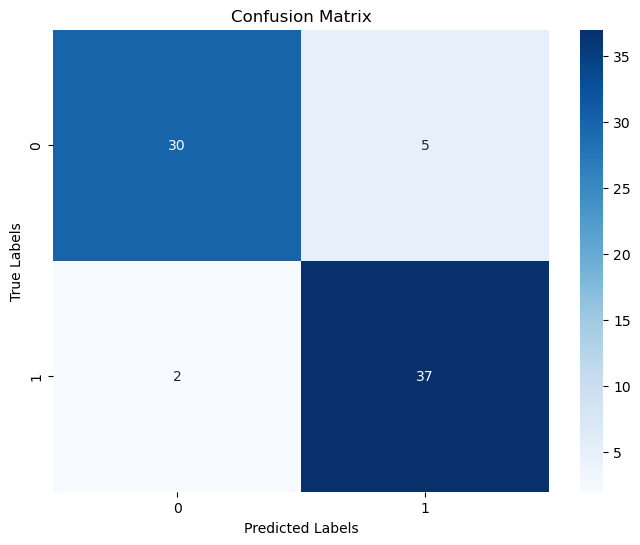

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

# accuracy_ci = np.percentile(accuracy_bootstraps, [2.5, 97.5])
# print("Accuracy: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(accuracy_bootstraps), accuracy_ci[0], accuracy_ci[1]))

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted probabilities (y_pred_prob_test)
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_test = np.where(y_pred_prob_test >= 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


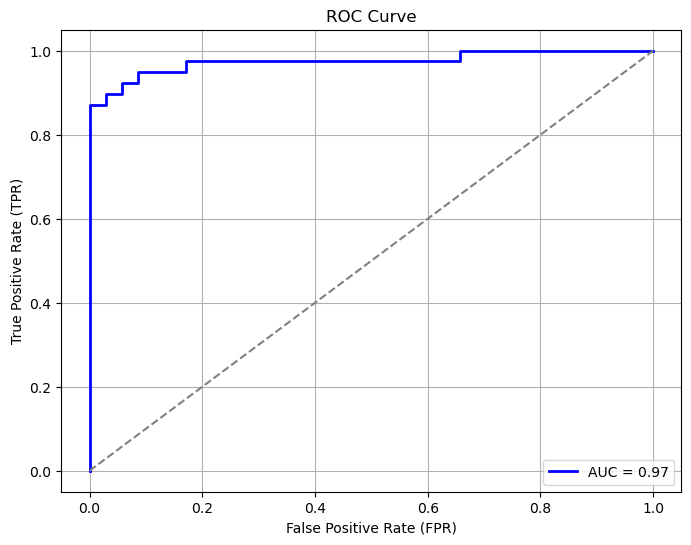

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

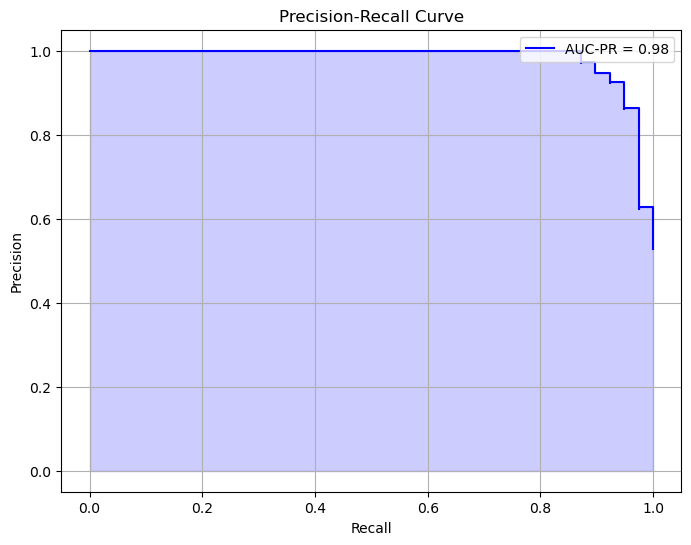

In [66]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_prob_test)

# Plot the AUC-PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'AUC-PR = {avg_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [67]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Print the feature importances
print("Feature Importances:")
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance:.3f}")

Feature Importances:
voyage_details_category_no_travel: 2.319
sympt_vomissements_1.0: 2.262
sympt_inflammation_1.0: 1.903
contact_pers_febrile_1.0: 1.745
voyage_details_category_inside_thies_region: 1.487
sympt_mal_tete_1.0: 1.386
TDR_Resultat_1.0: 1.193
contact_presence_rats_1.0: 1.122
saison_pluie: 0.951
Sexe_F: 0.915
sympt_eruption_cutanee_1.0: 0.782
sympt_mal_dos_1.0: 0.754
sympt_difficulte_respirer_1.0: 0.719
Antibiotiques pris_1.0: 0.711
Age: 0.682
sympt_abdo_pain_1.0: 0.603
goutte_epaisse_Resultat_1.0: 0.595
frottis_mince_Resultat_1.0: 0.595
sympt_toux_maldegorge_1.0: 0.470
sympt_saignement_1.0: 0.349
Rythme cardiaque_category_encoded: 0.328
Diagnostic paludisme recu_1.0: 0.301
sympt_courbatures_1.0: 0.200
sympt_fatigue_faiblesse_1.0: 0.150
hemoglobine: 0.149
Temperature_category_encoded: 0.091
voyage_details_category_outside_senegal: 0.086
glycemie: 0.079
sympt_vertiges_1.0: 0.055


In [68]:
#import matplotlib.pyplot as plt

# Get the absolute values of the coefficients and sort them in descending order
#feature_importance_scores = np.abs(weighted_logreg.coef_[0])
#sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
#features, importances = zip(*sorted_feature_importances)

# Create a bar plot
#plt.figure(figsize=(10, 6))
#plt.bar(range(len(features)), importances)
#plt.xticks(range(len(features)), features, rotation=45, ha='right')
#plt.xlabel('Features')
#plt.ylabel('Importance Score')
#plt.title('Feature Importances')
#plt.tight_layout()
#plt.show()

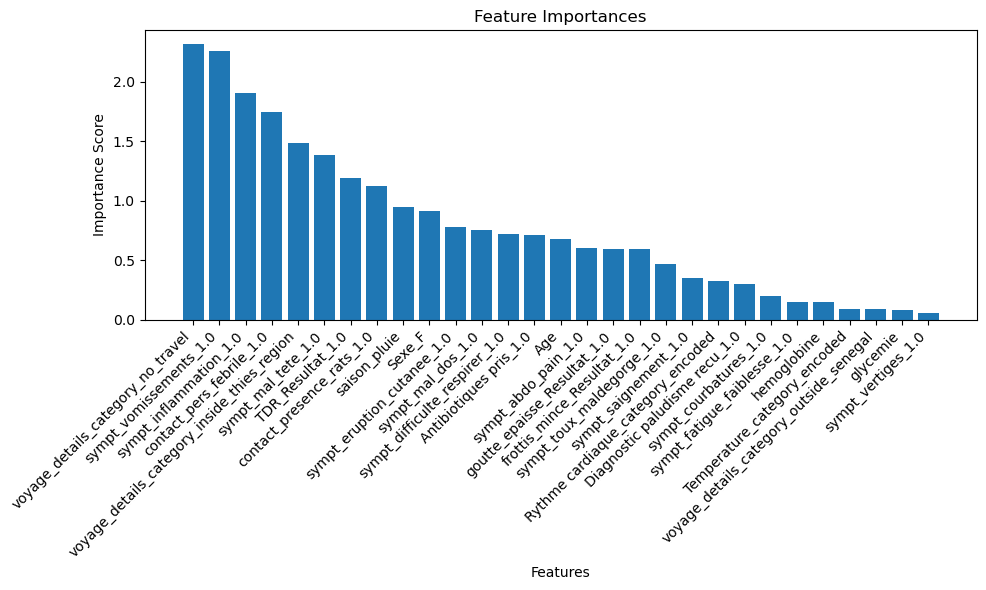

In [69]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importances)

# Create a bar plot with numerical values for bar heights
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), [score for score, _ in sorted_feature_importances])  # Use list comprehension for bar heights
plt.xticks(range(len(features)), [name for _, name in sorted_feature_importances], rotation=45, ha='right')  # Set xticks with feature names
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
